C:\Users\samson\AppData\Local\Temp\ipykernel_6068\1702539774.py:44: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(solutions[j].y[0][i], m * solutions[j].y[1][i])


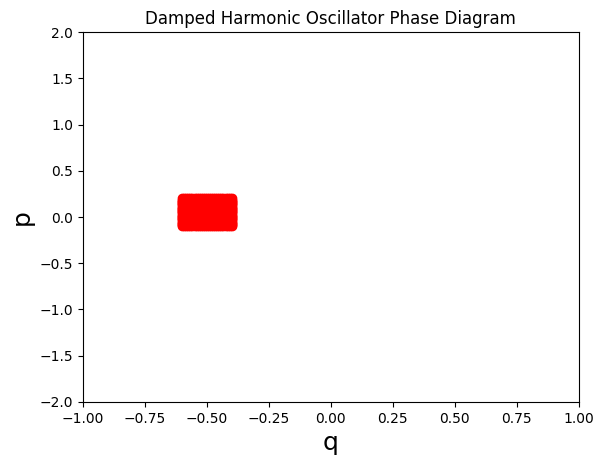

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# Constants for the spring-mass system
k = 10  # Spring constant
m = 1   # Mass
b = 0.5 # Damping coefficient

# ODE for the spring-mass system with friction
def spring_mass_friction_ODE(t, y):
    return [y[1], -k * y[0] / m - b * y[1] / m]

positions = np.linspace(-0.6, -0.4, 25)
velocities = np.linspace(-0.1, 0.2, 25)
initial_conditions = [(x, v) for x in positions for v in velocities]

# Solve ODE for each set of initial conditions
time_span = [0, 10]
time_points = np.linspace(time_span[0], time_span[1], 300)  # More time points
solutions = [solve_ivp(spring_mass_friction_ODE, time_span, ic, t_eval=time_points) for ic in initial_conditions]

# Set up the figure for animation
fig, ax = plt.subplots()
ax.set_xlim(-1, 1)
ax.set_ylim(-2, 2)
ax.set_xlabel('q', fontsize=18)
ax.set_ylabel('p',fontsize=18)
ax.set_title('Damped Harmonic Oscillator Phase Diagram')

# Initialize the animation with empty plots
dots = [ax.plot([], [], 'ro')[0] for _ in initial_conditions]
line, = ax.plot([], [], 'b-')  # Blue line for trajectory

def init():
    for dot in dots:
        dot.set_data([], [])
    line.set_data([], [])
    return dots + [line]

# Animation function to update the plots
def animate(i):
    for j, dot in enumerate(dots):
        dot.set_data(solutions[j].y[0][i], m * solutions[j].y[1][i])
    # Update the blue line for the middle trajectory
    if i == 0:
        line.set_data([], [])
    else:
        # Choosing the middle initial condition for the blue line trajectory
        middle_index = len(initial_conditions) // 2
        line.set_data(solutions[middle_index].y[0][:i], m * solutions[middle_index].y[1][:i])
    return dots + [line]

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(solutions[0].t), interval=50)

# Save the animation as a GIF file
ani.save('DHM_0616_points.gif', writer='pillow')


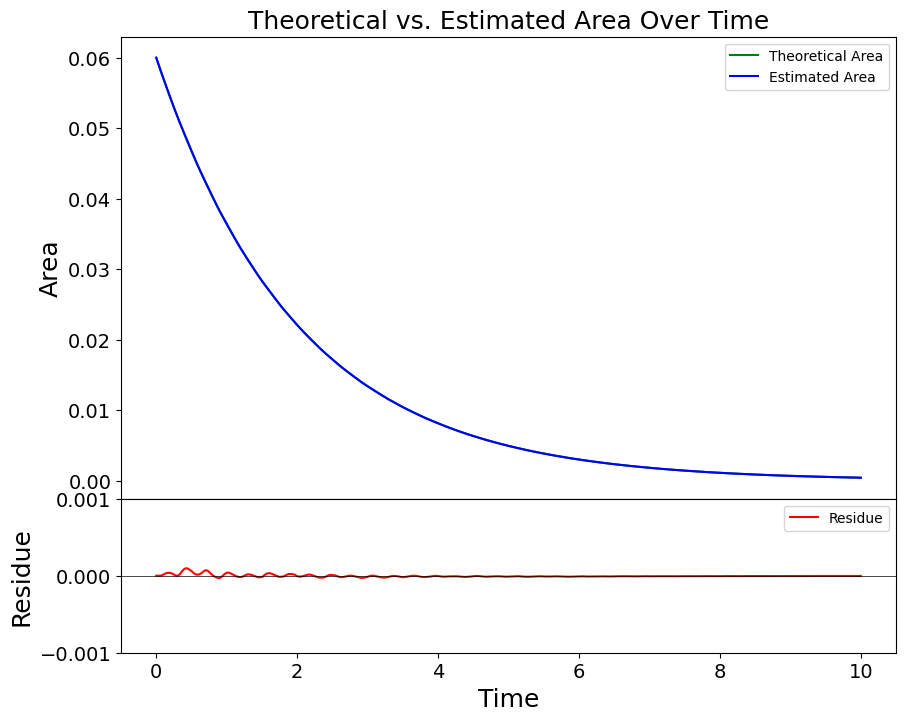

In [2]:
from scipy.spatial import ConvexHull


# Theoretical volume (area) change function
def theoretical_area_change(t, V0, b, m):
    return V0 * np.exp(-b / m * t)

# Calculate the initial volume (area), here using the provided initial conditions
V0 = (positions[-1] - positions[0]) * (velocities[-1] - velocities[0])

# Calculate theoretical areas over time
theoretical_areas = theoretical_area_change(time_points, V0, b, m)

# Function to calculate the convex hull area at each time step
def calculate_area_over_time(solutions):
    areas = []
    for i in range(len(solutions[0].t)):
        current_points = np.array([(s.y[0][i], m * s.y[1][i]) for s in solutions])
        hull = ConvexHull(current_points)
        areas.append(hull.volume)  # In 2D, volume attribute gives the area
    return areas

# Calculate the areas over time using the convex hull method
areas_over_time = calculate_area_over_time(solutions)

# Calculate the residue (difference) between the estimated and theoretical areas
residue = np.array(areas_over_time) - np.array(theoretical_areas)

# Create a figure with subplots, the second subplot being smaller
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plot the theoretical and estimated areas on the first subplot
ax1.plot(time_points, theoretical_areas, label='Theoretical Area', color='green')
ax1.plot(time_points, areas_over_time, label='Estimated Area', color='blue')
ax1.set_ylabel('Area', fontsize=18)
ax1.set_title('Theoretical vs. Estimated Area Over Time', fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax1.legend()

# Plot the residue on the second subplot
ax2.plot(time_points, residue, label='Residue', color='red')
ax2.axhline(0, color='black', linewidth=0.5)  # Horizontal line at residue = 0
ax2.set_ylim(-0.001, 0.001)  # Set y-axis limits for residue
ax2.set_xlabel('Time', fontsize=18)
ax2.set_ylabel('Residue', fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax2.legend()

# Adjust the layout so there is no space between subplots
plt.subplots_adjust(hspace=0)

# Display the plots
plt.show()

# Output the initial area, the first 10 values of theoretical and estimated areas, and the residue for reference
#(V0, theoretical_areas[:10], areas_over_time[:10], residue[:10])


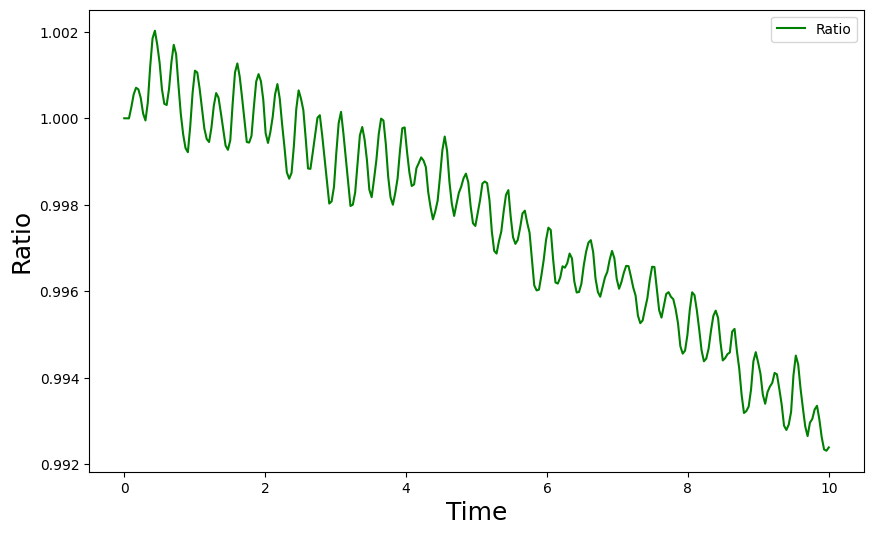

In [3]:
# Calculate the ratio of estimated area to theoretical area
ratio = np.array(areas_over_time) / np.array(theoretical_areas)

# Plot the ratio over time
plt.figure(figsize=(10, 6))
plt.plot(time_points, ratio, label='Ratio', color='green')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Ratio', fontsize=18)
plt.legend()
plt.show()

# Output the initial part of the ratio array for reference
#ratio[:10]  # Display the first 10 values as a sample


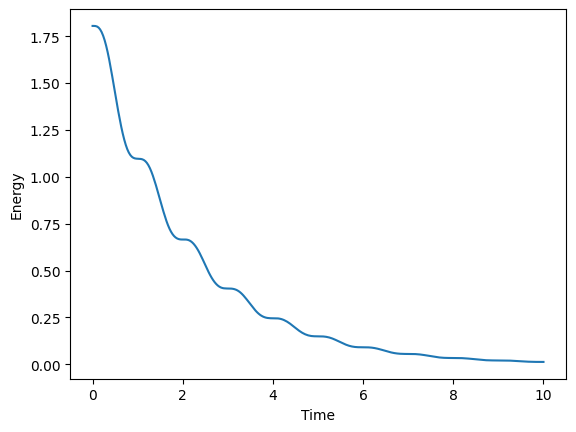

In [4]:
Energy = [0.5 * m * (solutions[0].y[1])**2 + 0.5 * k * (solutions[0].y[0])**2]
plt.plot(solutions[0].t, Energy[0])
plt.xlabel('Time')
plt.ylabel('Energy')
plt.show()
#print(Energy[0])